In [1]:
from sklearn.datasets import load_svmlight_file
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt

In [3]:
data=load_svmlight_file(r'F:\\机器学习实验\a9a_train.txt')

In [4]:
data_test=load_svmlight_file(r'F:\\机器学习实验\\a9a_test.txt')

In [5]:
y=data[1]
X=data[0]
X=X.todense()
y=np.reshape(y,(len(y),1))
y=np.mat(y)

In [6]:
X=np.hstack((X,np.ones((len(y),1))))

In [7]:
y_test=data_test[1]
X_test=data_test[0]
X_test=X_test.todense()
y_test=np.reshape(y_test,((len(y_test),1)))

In [8]:
X_test=np.hstack((X_test,np.zeros((len(y_test),1))))

In [9]:
X_test=np.hstack((X_test,np.ones((len(y_test),1))))

In [10]:
y[y==-1]=0#把-1换成0

In [11]:
y_test[y_test==-1]=0

In [12]:
def h(X,w):
    return 1/(1+np.exp(-X*w))

sigmoid函数公式为：
$$h_w(x)=\frac{1}{1+e^{-w^{T}x}}$$

In [13]:
def gradient(X,w,y):
    return X.T*(h(X,w)-y)/(len(y))

梯度
$$\frac{\partial J}{\partial w}=\frac{1}{m}\sum_{i=1}^{m}(h_w(X_i)-y_i)X_i$$

In [14]:
def predict(X,w): #设置阈值为0.5
    y_pre=h(X,w)
    y=np.ones((np.shape(X)[0],1))
    y[y_pre<0.5]=0
    return y

In [101]:
def loss(X,w,y):#损失函数
    y_pre=predict(X,w)
    N=np.zeros((len(y),1))
    N[y_pre!=y]=1
    return np.sum(N)/len(y_pre)

In [118]:
def NAGtrain(X,y,X_test,y_test,gamma,eta,it,size):#it 迭代次数 size每次求梯度的部分占所有数据的比例
    (n,m)=X.shape
    w=np.zeros((m,1)) #权重w初始化为0
    v=np.zeros((m,1)) #vt初始化为0
    time=[]
    test_err_rate=[]
    train_err_rate=[]
    for i in range(0,it):
        time.append(i+1)
        X_train, X_random, y_train, y_random = train_test_split(X, y, test_size=size, random_state=42)
        gra=gradient(X_random,w-gamma*v,y_random)
        v=gamma*v+eta*gra
        w=w-v
        
        test_err_rate.append(loss(X_test,w,y_test))
        train_err_rate.append(loss(X,w,y))
    return w,time,test_err_rate,train_err_rate

NAG实现原理：
$$g_t=\frac{\partial J}{\partial w}(W_{t-1}-\gamma v_{t-1})$$
$$v_t=\gamma v_{t-1}+\eta g_{t-1}$$
$$W_t=W_{t-1}-v_t$$

In [117]:
def RMStrain(X,y,X_test,y_test,gamma,LearningRate,it,size):
    (n,m)=X.shape
    w=np.zeros((m,1))#权重w初始化为0
    G=np.zeros((m,1))#Gt初始化为0
    time=[]
    test_err_rate=[]
    train_err_rate=[]
    epsilon=0.0000001
    for i in range(0,it):
        time.append(i+1)
        X_train, X_random, y_train, y_random = train_test_split(X, y, test_size=size, random_state=42)
        gra=gradient(X_random,w,y_random)
        G=gamma*G+(1-gamma)*np.multiply(gra,gra)
        w=w-np.multiply((LearningRate/np.sqrt(G+epsilon)),gra)
        
        test_err_rate.append(loss(X_test,w,y_test))
        train_err_rate.append(loss(X,w,y))
    return w,time,test_err_rate,train_err_rate

RMS
$$g_t=\frac{\partial J(W_{t-1})}{\partial w}$$
$$G_t=\gamma G_t+(1-\gamma)g_t·g_t$$

$$W_t=W_{t-1}-\frac{\eta}{\sqrt{G_t+\epsilon }}·g_t$$

In [116]:
def AdaDelta(X,y,X_test,y_test,gamma,it,size):
    (n,m)=X.shape
    w=np.zeros((m,1))#权重w初始化为0
    G=np.zeros((m,1))#Gt初始化为0
    delta=np.zeros((m,1))
    time=[]
    test_err_rate=[]
    train_err_rate=[]
    epsilon=0.0000001
    for i in range(0,it):
        time.append(i+1)
        X_train, X_random, y_train, y_random = train_test_split(X, y, test_size=size, random_state=42)
        gra=gradient(X_random,w,y_random)
        G=gamma*G+(1-gamma)*np.multiply(gra,gra)
        delta_w=-np.multiply((np.sqrt(delta+epsilon)/np.sqrt(G+epsilon)),gra)
        w=w+delta_w
        delta=gamma*delta+(1-gamma)*np.multiply(delta_w,delta_w)
        
        test_err_rate.append(loss(X_test,w,y_test))
        train_err_rate.append(loss(X,w,y))
    return w,time,test_err_rate,train_err_rate

Adadelta
$$g_t=\Delta J(W_{t-1})$$
$$G_t=\gamma W_t+(1-\gamma)g_t·g_t$$
$$\Delta W_t=-\frac{\sqrt{\Delta _{t-1}+\epsilon}}{\sqrt{G_t+\epsilon }}·g_t$$
$$W_t=W_{t-1}+\Delta W_t$$
$$\Delta _t=\gamma \Delta _{t-1}+(1-\gamma)\Delta W_t·\Delta W_t$$

In [115]:
def Adam(X,y,X_test,y_test,beta,gamma,LearningRate,it,size):
    (n,m)=X.shape
    w=np.zeros((m,1))#权重w初始化为0
    G=np.zeros((m,1))#Gt初始化为0
    mt=0 #mt初始化为0
    time=[]
    test_err_rate=[]
    train_err_rate=[]
    for i in range(1,it+1):
        time.append(i)
        X_train, X_random, y_train, y_random = train_test_split(X, y, test_size=size, random_state=42)
        gra=gradient(X_random,w,y_random)
        mt=beta*mt+(1-beta)*gra
        G=gamma*G+(1-gamma)*np.multiply(gra,gra)
        a=LearningRate*(np.sqrt(1-gamma**i)/(1-beta**i))
        w=w-a*mt/np.sqrt(G+0.00001)
        
        test_err_rate.append(loss(X_test,w,y_test))
        train_err_rate.append(loss(X,w,y))
    return w,time,test_err_rate,train_err_rate

Adam
$$g_t=\frac{\partial J(W_{t-1})}{\partial} w$$
$$m_t=\beta _1m_{t-1}+(1-\beta)g_t$$
$$G_t=\gamma G_t+(1-\gamma)g_t·g_t$$
$$\alpha=\eta\frac{\sqrt{1-\gamma ^t}}{1-\beta ^t}$$
$$\Theta=\Theta_{t-1}-\alpha\frac{m_t}{\sqrt{G_t+\epsilon}}$$

In [110]:
theta,times,NAG_test_err,NAG_train_err=NAGtrain(X,y,X_test,y_test,0.9,0.01,1000,0.01)

In [111]:
theta,times,RMS_test_err,RMS_train_err=RMStrain(X,y,X_test,y_test,0.9,0.001,1000,0.01)

In [112]:
theta,times,AdaDelta_test_err,AdaDelta_train_err=AdaDelta(X,y,X_test,y_test,0.95,1000,0.01)

In [113]:
theta,times,Adam_test_err,Adam_train_err=Adam(X,y,X_test,y_test,0.9,0.99,0.001,1000,0.01)

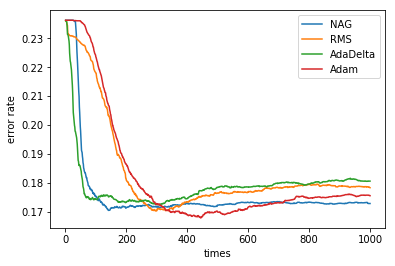

In [114]:
plt.xlabel('times')
plt.ylabel('error rate')
plt.plot(times,NAG_test_err,label="NAG")
plt.plot(times,RMS_test_err,label="RMS")
plt.plot(times,AdaDelta_test_err,label="AdaDelta")
plt.plot(times,Adam_test_err,label="Adam")
plt.legend()
plt.show()

In [49]:
NAG_test_err[-1]

0.17290092746145813

In [77]:
RMS_test_err[-1]

0.17836742214851667

In [71]:
AdaDelta_test_err[-1]

0.18106995884773663

In [52]:
Adam_test_err[-1]

0.1756034641606781